# Relacionando dados de temperatura do ar e consumo de energia elétrica em edificações

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_electricity = pd.read_csv("D:/Sync/Profissional/Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/meters/raw/electricity.csv", index_col='timestamp', parse_dates=True)
df_weather = pd.read_csv("D:/Sync/Profissional/Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/weather/weather.csv", index_col='timestamp', parse_dates=True)

In [3]:
df_electricity.head()

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [4]:
df_weather.head()

,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,,
2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5


# Preparando os dados elétricos

O conjunto de dados apresenta um edifício por coluna e faz referência ao local do edifício no seu nome. São os mesmo nomes encontrados no conjunto de dados climáticos na coluna `site_id`. Tanto para o lugar quanto para o edifício foram usados apelidos, por questão de anonimato.

## Trabalhando com um único edifício

Começo trabalhando com um edifício específico como exemplo, para compreender como posso fazer o tratamentos dos dados. Por serem dados de medição temporal em horas, devo limpar os dados e reajustá-los para outra escala, em dias ou em meses.

In [5]:
edificio_01 = df_electricity.iloc[:,[0]]
edificio_01

,Panther_parking_Lorriane
timestamp,
2016-01-01 00:00:00,0.0000
2016-01-01 01:00:00,0.0000
2016-01-01 02:00:00,0.0000
2016-01-01 03:00:00,0.0000
2016-01-01 04:00:00,0.0000
...,...
2017-12-31 19:00:00,15.4830
2017-12-31 20:00:00,12.7224
2017-12-31 21:00:00,11.2822


Nesse caso "Panther" faz referência ao `site_id`, "parking" faz referência ao tipo de uso do edifício e "Lorriane" ao apelido dado ao edifício.

In [6]:
edificio_01.index[0].month

1

In [7]:
edificio_01.index[0].hour

0

In [8]:
edificio_01.index[0].year

2016

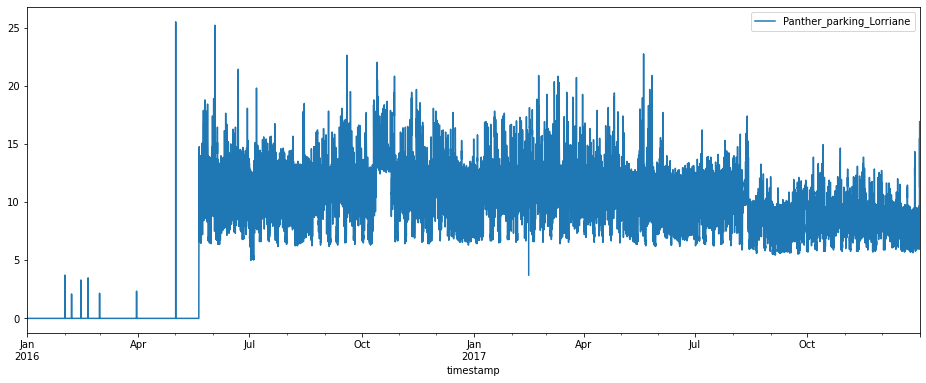

In [9]:
edificio_01.plot(figsize=(16,6))
plt.show()

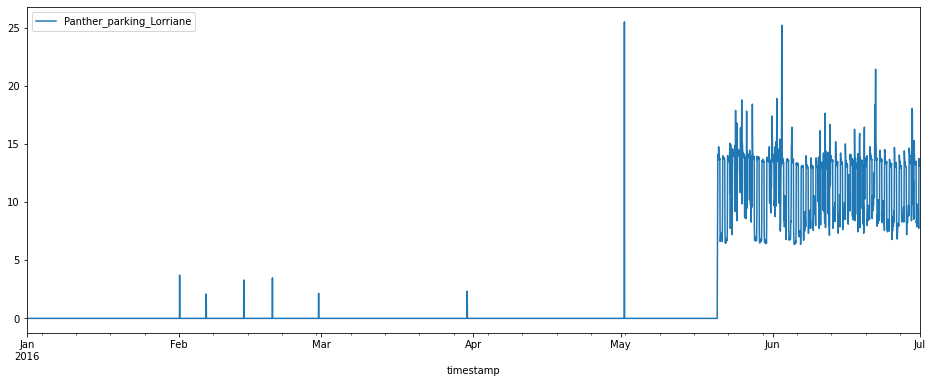

In [10]:
edificio_01.truncate(after='2016-07-01').plot(figsize=(16, 6))
plt.show()

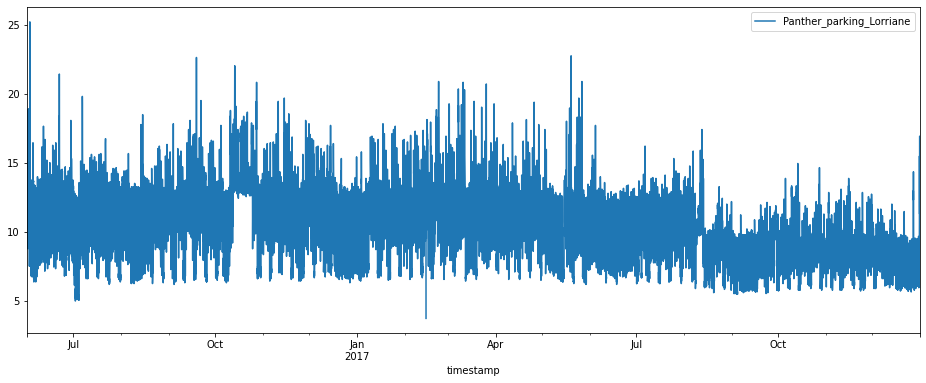

In [11]:
edificio_01 = edificio_01.truncate(before="2016-06-01")
edificio_01.plot(figsize=(16,6))
plt.show()

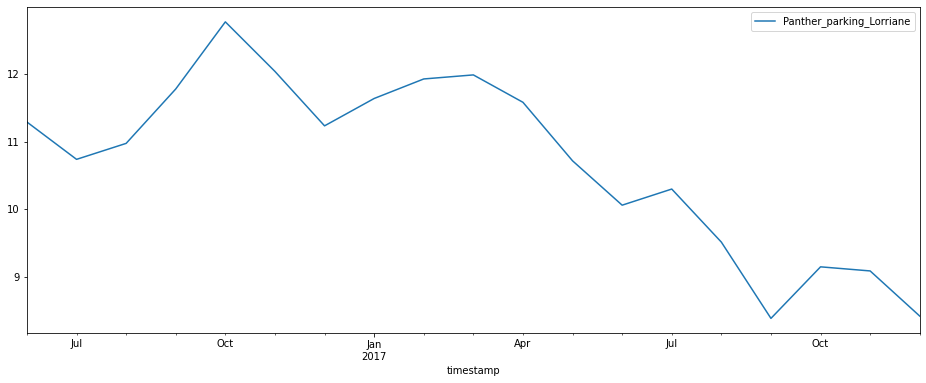

In [12]:
edificio_01_mensal = edificio_01.resample("M").mean()
edificio_01_mensal.plot(figsize=(16,6))
plt.show()

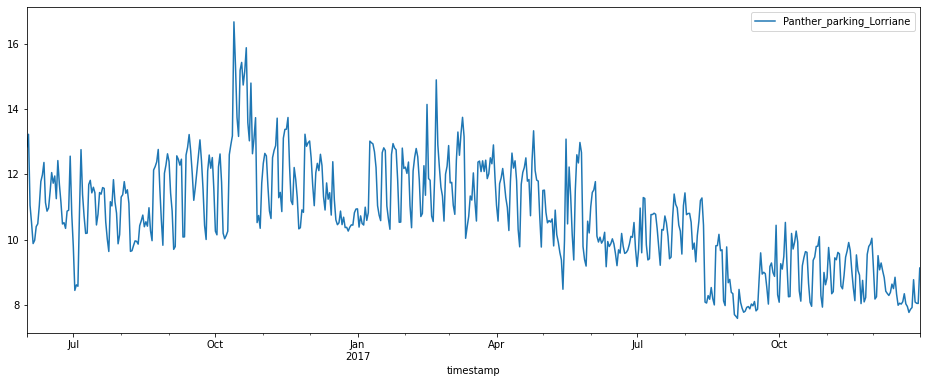

In [13]:
edificio_01_diario = edificio_01.resample("D").mean()
edificio_01_diario.plot(figsize=(16,6))
plt.show()

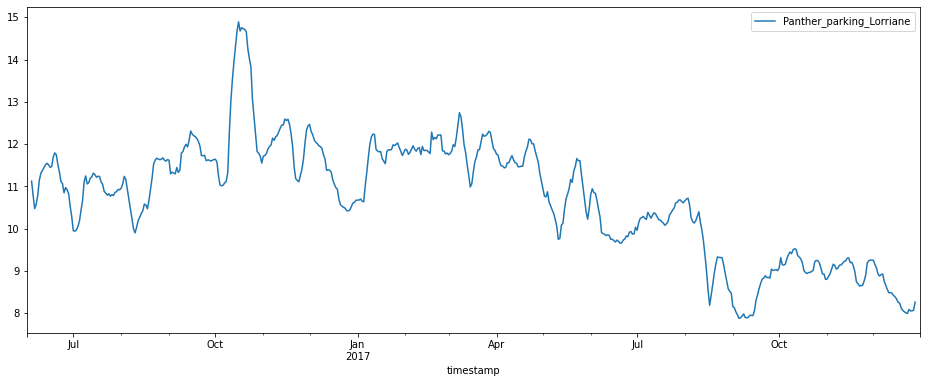

In [14]:
edificio_01_media_movel = edificio_01_diario.rolling(7, center=True).mean()
edificio_01_media_movel.plot(figsize=(16,6))
plt.show()

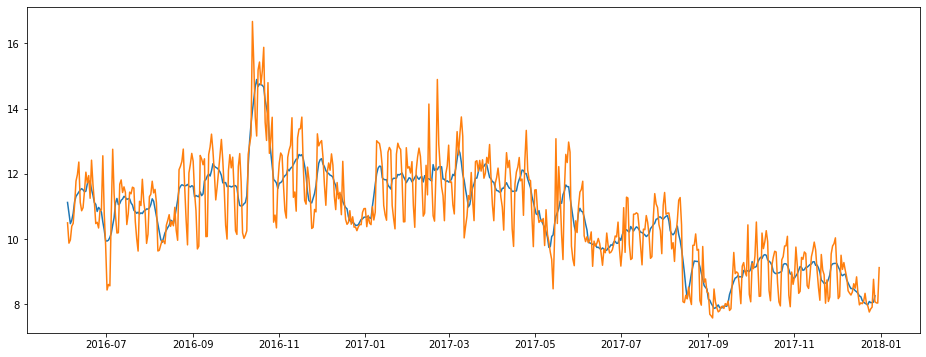

In [15]:
start, end = '2016-06-04', '2017-12-31'
fig, ax = plt.subplots(figsize=(16, 6))
#edificio_01_media_movel[start]
ax.plot(edificio_01_media_movel.loc[start:end, "Panther_parking_Lorriane"])
ax.plot(edificio_01_diario.loc[start:end, "Panther_parking_Lorriane"])

## Trabalhando com um grupo de edifícios

Agora vou repetir esse processo mas trabalhando com um grande número de edifícios. Inicialmente trabalharei com 20, para depois testar se posso fazer mais.
Para efeito de comparação, vou selecionar edifícios de um mesmo grupo de uso. De acordo com a análise dos metadados, o grupo educacional é o que tem uma maior quantidade de edifícios. Posso selecionar esse grupo pelo nome nos dados elétricos.

In [16]:
df_electricity.iloc[:,1].name
edu_buildings = [column for column in df_electricity.columns if 'education' in df_electricity[column].name]
df_electricity_edu = df_electricity.loc[:,edu_buildings]
df_electricity_edu

,Panther_education_Teofila,Panther_education_Jerome,Panther_education_Misty,Panther_education_Tina,Panther_education_Janis,Panther_education_Quintin,Panther_education_Violet,Panther_education_Edna,Panther_education_Sophia,Panther_education_Hugh,...,Cockatoo_education_Julio,Cockatoo_education_Julia,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_Oliver,Cockatoo_education_Marva,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_education_Amira,Cockatoo_education_Tyler
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,...,165.825,25.075,878.600,33.900,137.325,104.575,87.625,381.675,38.025,727.575
2016-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,...,165.425,24.900,879.225,34.550,139.700,103.725,96.925,379.075,38.175,731.200
2016-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,...,161.575,24.125,887.900,33.650,139.000,103.800,89.650,384.575,38.125,724.675
2016-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,...,160.450,24.075,886.700,34.900,136.200,101.075,90.675,391.750,37.800,737.375
2016-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,...,161.525,25.275,895.825,33.950,137.200,102.925,92.450,394.675,37.975,721.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,105.6374,465.0898,16.3231,1.6003,11.1872,296.5572,126.7445,108.8210,150.0289,621.8800,...,158.500,29.200,883.750,45.300,110.700,122.675,83.700,325.025,38.750,704.950
2017-12-31 20:00:00,107.7348,463.6895,16.0831,1.9004,10.7641,292.7565,130.2651,108.0208,150.0289,622.8002,...,158.675,29.475,833.250,44.675,112.450,109.825,86.650,320.675,38.750,695.700
2017-12-31 21:00:00,106.1295,461.2890,16.1631,2.0004,10.7981,260.7503,126.1043,109.8212,150.4290,620.3997,...,160.125,28.050,813.175,44.050,113.475,106.975,82.250,318.725,38.875,687.325


Agora vou selecionar apenas os 20 primeiros

In [17]:
edu_small_group = df_electricity_edu.iloc[:,:20]
edu_small_group

,Panther_education_Teofila,Panther_education_Jerome,Panther_education_Misty,Panther_education_Tina,Panther_education_Janis,Panther_education_Quintin,Panther_education_Violet,Panther_education_Edna,Panther_education_Sophia,Panther_education_Hugh,Panther_education_Annetta,Panther_education_Ivan,Panther_education_Alecia,Panther_education_Rosalie,Panther_education_Jonathan,Panther_education_Neal,Panther_education_Mohammad,Panther_education_Enriqueta,Panther_education_Shelton,Panther_education_Aurora
timestamp,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2016-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,26.9592,0.0000,0.0000,0.0000
2016-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2016-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2016-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,105.6374,465.0898,16.3231,1.6003,11.1872,296.5572,126.7445,108.8210,150.0289,621.8800,79.2153,144.7479,160.0309,47.8092,0.0,123.4238,101.4286,57.2910,63.8123,68.0131
2017-12-31 20:00:00,107.7348,463.6895,16.0831,1.9004,10.7641,292.7565,130.2651,108.0208,150.0289,622.8002,91.2176,159.3908,142.0274,45.0087,0.0,124.0239,103.2729,57.6111,63.9123,67.8131
2017-12-31 21:00:00,106.1295,461.2890,16.1631,2.0004,10.7981,260.7503,126.1043,109.8212,150.4290,620.3997,89.2172,144.9880,148.0286,44.6086,0.0,131.9254,99.8383,57.9312,63.9123,69.0133


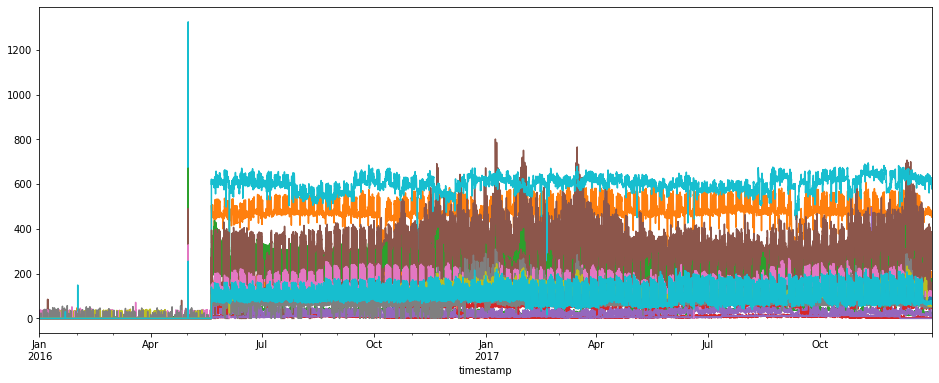

In [18]:
for col in edu_small_group.columns:
    edu_small_group[col].plot(figsize=(16,6))

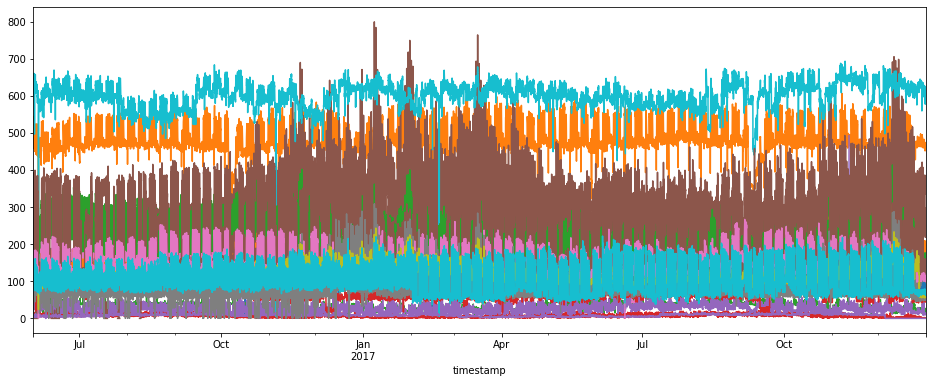

In [19]:
edu_small_group= edu_small_group.truncate(before="2016-06-01")
for col in edu_small_group.columns:
    edu_small_group[col].plot(figsize=(16,6))

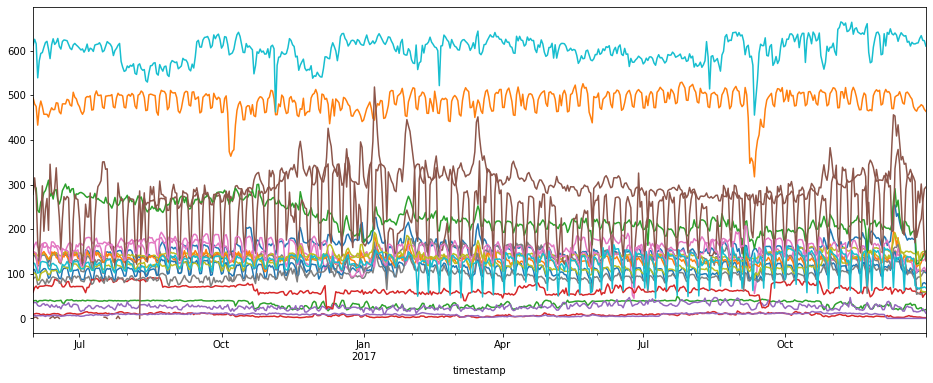

In [31]:
edu_small_group_diario = edu_small_group.resample("D").mean()
for col in edu_small_group_diario.columns:
    edu_small_group_diario[col].plot(figsize=(16,6))

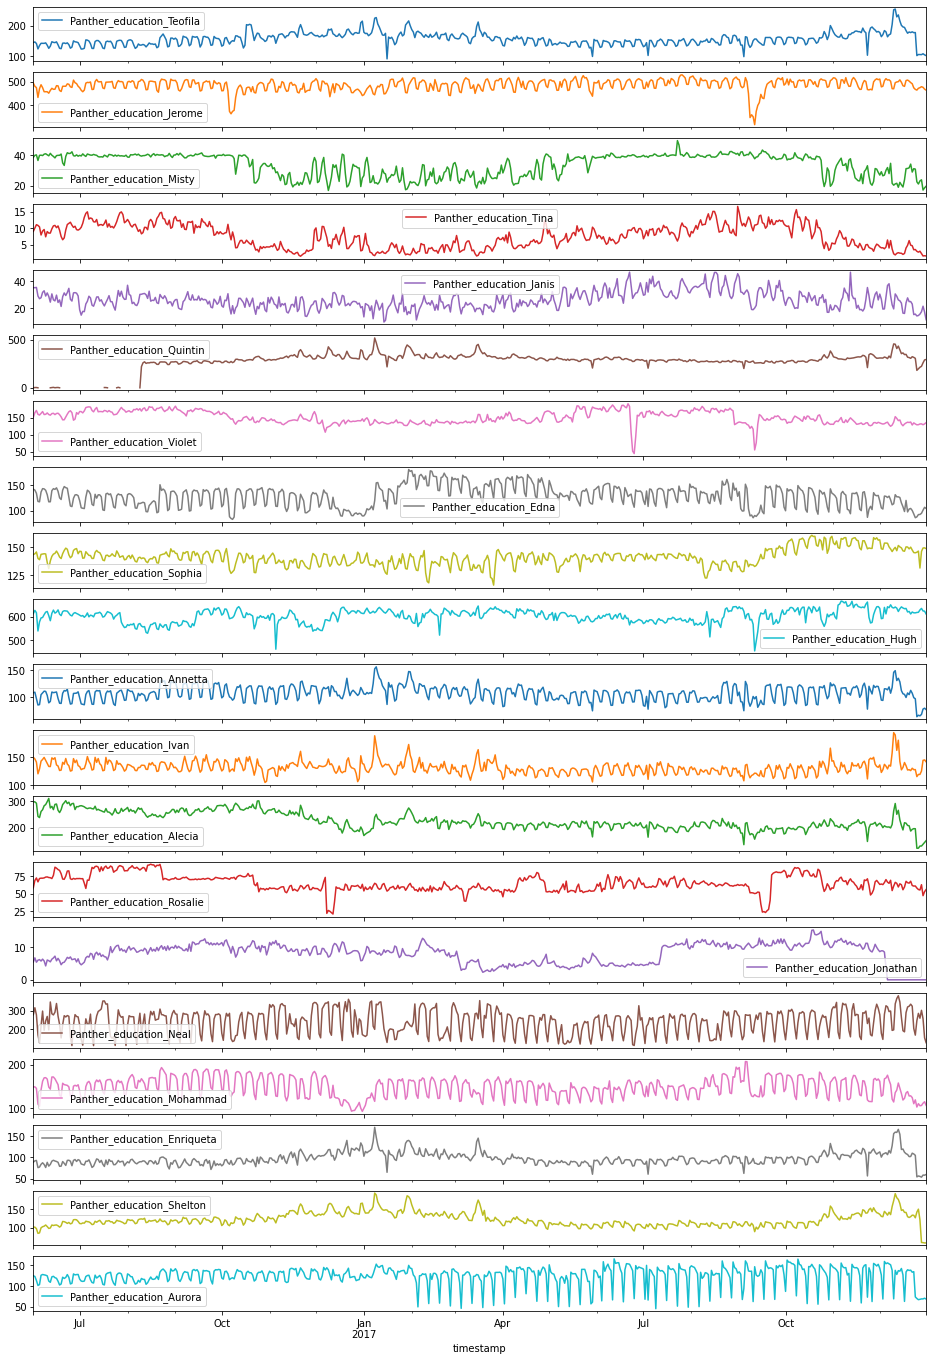

In [21]:
edu_small_group_diario.plot(figsize=(16,24), subplots=True)
plt.show()

## Trabalhando com todos os edifícios educacionais

Agora posso fazer esse processo com todos os edifícios do grupo educacional. Para checar eu crio gráficos dos 20 primeiros edifícios usando a função iloc[:,:20]. Esses gráficos devem ser iguais aos que criei anteriormente.


In [22]:
df_electricity_edu = df_electricity_edu.truncate(before='2016-06-01')
df_electricity_edu = df_electricity_edu.resample("D").mean()


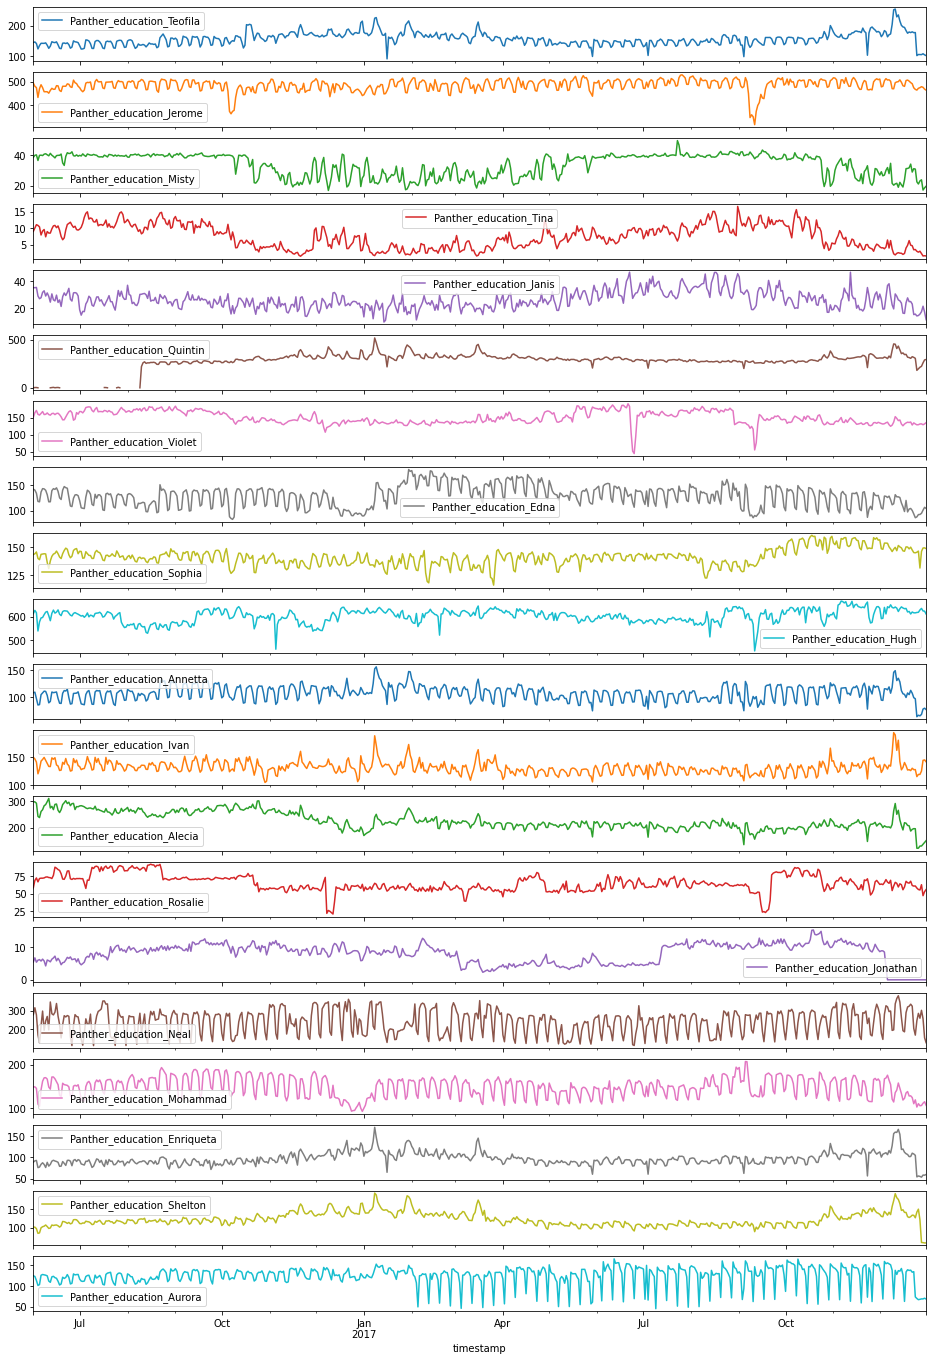

In [23]:
df_electricity_edu.iloc[:,:20].plot(figsize=(16, 24), subplots=True)
plt.show()

# Trabalhando com os dados climáticos

Inicialmente vou trabalhar apenas com dados de temperatura do ar. Por isso vou considerar apenas as colunas 'airTemperatura' e 'site_id' para que eu pegue os dados de temperatura separados por localidade.
Os dados climáticos devem ter o mesmo padrão dos dados de eletricidade para que possam ser combinados depois. Portanto, faço a transformação para média diária e para o mesmo período.

In [24]:
df_air_temp = df_weather.iloc[:, :2]
df_air_temp = df_air_temp.pivot(columns='site_id', values='airTemperature')

# fill missing values
df_air_temp.fillna(method='ffill', inplace=True) 

# gets the same period as df_electricity_edu
df_air_temp = df_air_temp.truncate(before='2016-06-01') 

# daily
df_air_temp = df_air_temp.resample('D').mean() 


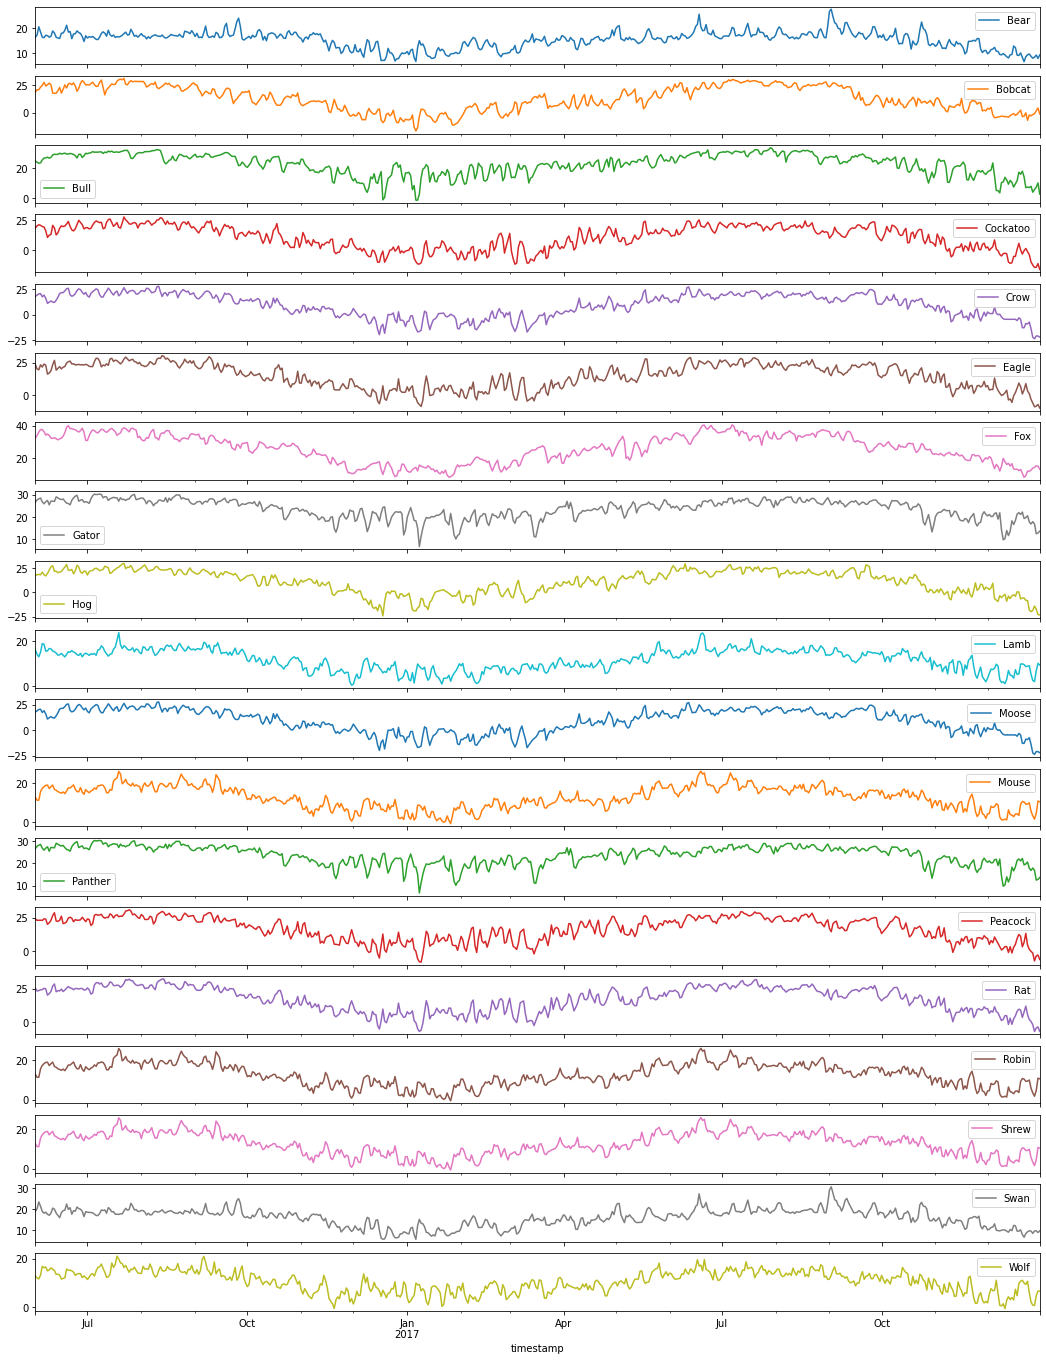

In [25]:
df_air_temp.plot(figsize=(18,24), subplots=True)
plt.show()

# Combinando os dados

In [26]:
df_all = pd.concat([df_electricity_edu, df_air_temp], axis=1)
df_all

,Panther_education_Teofila,Panther_education_Jerome,Panther_education_Misty,Panther_education_Tina,Panther_education_Janis,Panther_education_Quintin,Panther_education_Violet,Panther_education_Edna,Panther_education_Sophia,Panther_education_Hugh,...,Lamb,Moose,Mouse,Panther,Peacock,Rat,Robin,Shrew,Swan,Wolf
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-01,144.914129,494.241213,38.460758,9.018425,35.313433,0.000000,150.962462,142.219117,143.694408,612.236483,...,16.208333,17.862500,12.754167,26.600000,24.279167,25.341667,12.754167,12.754167,19.016667,12.862500
2016-06-02,146.750654,480.571900,39.777675,10.043604,35.289529,2.688021,164.645104,140.435433,144.327846,625.605717,...,14.291667,19.029167,11.250000,27.620833,23.137500,23.291667,11.250000,11.250000,20.379167,12.154167
2016-06-03,141.627583,475.062508,40.057725,11.039633,35.489317,2.692187,171.046342,134.259250,145.978171,615.822162,...,13.166667,20.333333,11.320833,28.104167,23.166667,23.541667,11.320833,11.320833,23.529167,11.687500
2016-06-04,123.924458,433.196100,36.420363,10.814592,29.142871,0.000000,159.884179,118.297825,140.227067,539.210721,...,15.208333,20.520833,15.625000,28.475000,23.266667,24.120833,15.625000,15.625000,21.454167,13.316667
2016-06-05,135.027475,470.578329,39.737667,10.364504,27.136525,NaN,157.617075,117.547683,139.060175,577.478096,...,19.041667,17.379167,17.291667,26.795833,23.045833,24.287500,17.291667,17.291667,19.037500,16.908333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,105.432388,474.783287,23.167796,3.042250,15.750742,213.778762,131.598737,92.859575,131.608733,627.484433,...,2.666667,-22.241667,3.358333,17.891667,-1.250000,-1.716667,3.358333,3.358333,8.600000,0.862500
2017-12-28,105.305625,479.021608,23.867925,2.350446,17.541896,223.418121,131.878783,95.126692,146.428262,633.863988,...,2.166667,-23.683333,1.650000,16.837500,-7.104167,-6.737500,1.650000,1.650000,9.766667,0.762500
2017-12-29,108.087942,476.287750,17.236650,1.608633,21.587542,259.737625,129.318275,101.294546,149.528863,623.268617,...,6.916667,-20.904167,4.595833,12.479167,-3.420833,-4.129167,4.595833,4.595833,9.829167,4.787500


Na concatenação foram adicionado ao fim do conjunto de dados todas as colunas referentes à temperatura. Dessa forma eu posso criar uma relação entre a leitura de gastos energéticos e a temperatura do ar. Para isso, é necessário que eu escolha as colunas de forma correspondente. O nome de cada edifício possui o nome do local a que ele corresponde.



In [27]:
df_all[['Panther_education_Teofila', 'Panther']]

,Panther_education_Teofila,Panther
timestamp,,
2016-06-01,144.914129,26.600000
2016-06-02,146.750654,27.620833
2016-06-03,141.627583,28.104167
2016-06-04,123.924458,28.475000
2016-06-05,135.027475,26.795833
...,...,...
2017-12-27,105.432388,17.891667
2017-12-28,105.305625,16.837500
2017-12-29,108.087942,12.479167


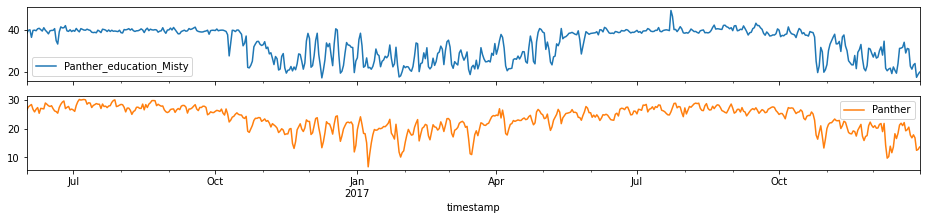

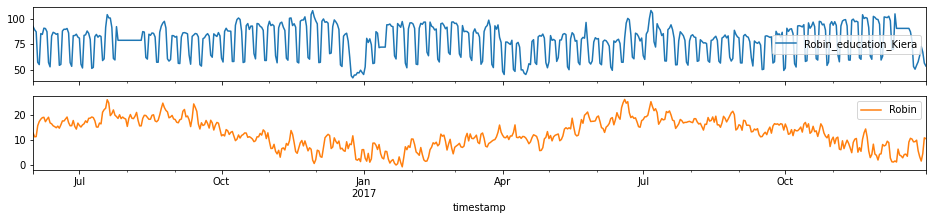

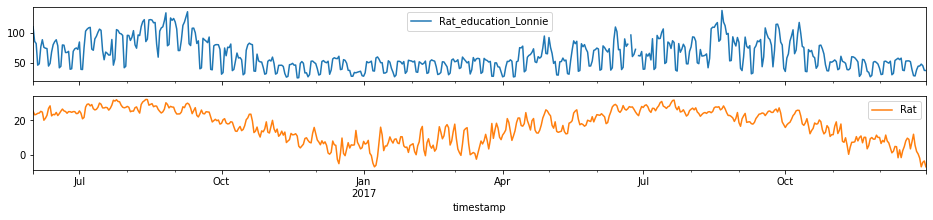

In [28]:
building_name = df_all.columns[[2, 42, 222]]

for building in building_name:
    site_id_from_building = building.split('_')[0] # get the name of the site ID from the name of the Building
    comparison = df_all.loc[:, [building, site_id_from_building]]
    comparison.plot(figsize=(16, 3), subplots=True)

plt.show()

Essa função abaixo criar, a partir de um valor de referência, uma coluna de classificação entre aquecimento ou resfriamento.
O valor de referência é 14°C. Enteden-se que acima disso, geralmente os prédios necessitam de estratégias de resfriamento. Abaixo disso, os edifícios necessitam de aquecimento.
Essa classificação vai ser utilizada para colorir os `plots` à seguir

In [29]:
def heat_cooling(x):
    if x < 14:
        return 'Heating'
    else:
        return 'Cooling'

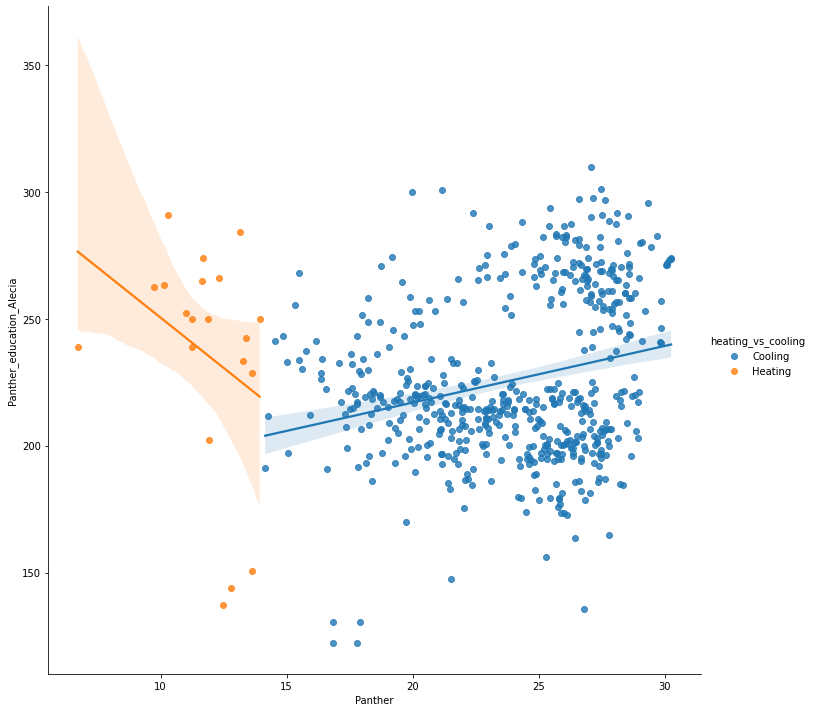

In [30]:
building_name = df_all.columns[12]
site_id_from_building = building_name.split('_')[0]
site_id_from_building
comparison = df_all.loc[:, [building_name, site_id_from_building]]
comparison
comparison['heating_vs_cooling'] = comparison[site_id_from_building].apply(lambda x: heat_cooling(x))
sns.lmplot(data=comparison, x=site_id_from_building, y=building_name, hue='heating_vs_cooling', height=10)
plt.show()